# Technical Assignment

I have attached a data set with information from 2,225 articles from the BBC, divided into 5 sections. For this data set please answer:

•	How many articles are about G20 countries? Please show the number of articles for each individual country and those that have an overlap in talking about several countries.

    o  	Note that we’re interested in identifying all topics about these countries, and not just the ones that mention them by name


•	What are the most common themes in each article section?


Additional Questions
1.	How long did you work on the technical assignment?
2.	What tools did you use for the assignment?
3.	Please describe the process you used to complete the assignment.
4.	(Not related to this assignment) How would you test if survey responses were filled at random by certain individuals, as opposed to truthful selections?


# Answers

### Problem 1

ANSWERS BASED OFF CODE 

Total articles that mention a country from G20: 788

Number of articles that mentions each country

Australia :  146

Canada :  34

Saudi_Arabia :  9

United_States :  53

India :  93

Russia :  98

South_Africa :  59

Turkey :  15

Argentina :  24

Brazil :  35

Mexico :  18

France :  189

Germany :  92

Italy :  83

United_Kingdom :  12

China :  92

Indonesia :  22

Japan :  120

South_Korea :  30


### Problem 2

ANSWERS BASED OFF ANALYSIS ON CODE

Business : China, Russia, Oil, Stock Market, Economy, Budget, Growth

Entertainment : Music, Films, Film Festivals, Awards, UK, BBC

Politics : Elections, Voting, Chancellor

Sport : Rugby (mostly), Cup, Olympics, Football

Tech : Software Security, Spam, Viruses, Gaming (Xbox, PS4, Nintendo)

# CODE

In [1]:
import sys
import os
import pandas as pd

In [2]:
#label directories 
bus_dir = os.listdir('./bbc/business')
ent_dir = os.listdir('./bbc/entertainment')
pol_dir = os.listdir('./bbc/politics')
sport_dir = os.listdir('./bbc/sport')
tech_dir = os.listdir('./bbc/tech')

In [3]:
# Read in Data

#instantiate each directory as a list
business = []
entertainment = []
politics = []
sport = []
tech = []

#appends all text files into each list

#business directory
for file in bus_dir:
    if file[-3:] == 'txt':
        with open(f'./bbc/business/{file}', 'r') as f:
            business.append(f.read())
            
#entertainment directory        
for file in ent_dir:
    if file[-3:] == 'txt':
        with open(f'./bbc/entertainment/{file}', 'r') as f:
            entertainment.append(f.read())
            
#politics directory  
for file in pol_dir:
    if file[-3:] == 'txt':
        with open(f'./bbc/politics/{file}', 'r') as f:
            politics.append(f.read())
            
#sports directory         
for file in sport_dir:
    if file[-3:] == 'txt':
        with open(f'./bbc/sport/{file}', 'r') as f:
            sport.append(f.read())
            
#tech directory          
for file in tech_dir:
    if file[-3:] == 'txt':
        with open(f'./bbc/tech/{file}', 'r') as f:
            tech.append(f.read())

In [4]:
# create dataframe with all articles together
df = pd.DataFrame({'articles':business + entertainment + politics + sport + tech})

In [5]:
#confirm all 2225 articles in dataframe 
df.shape

(2225, 1)

### How many articles are about G20 countries? 

In [6]:
g20 = [ "Australia",
       "Canada",
       "Saudi Arabia",
       "United States",
       "India",
       "Russia",
       "South Africa",
       "Turkey",
       "Argentina",
       "Brazil",
       "Mexico",
       "France",
       "Germany",
       "Italy",
       "United Kingdom",
       "China",
       "Indonesia",
       "Japan",
       "South Korea"]

In [7]:
for country in g20:
    df[country] = df.astype(str).sum(axis=1).str.contains(country)

In [8]:
df.head()

,articles,Australia,Canada,Saudi Arabia,United States,India,Russia,South Africa,Turkey,Argentina,Brazil,Mexico,France,Germany,Italy,United Kingdom,China,Indonesia,Japan,South Korea
0,Ad sales boost Time Warner profit\n\nQuarterly...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Dollar gains on Greenspan speech\n\nThe dollar...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Yukos unit buyer faces loan claim\n\nThe owner...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,High fuel prices hit BA's profits\n\nBritish A...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Pernod takeover talk lifts Domecq\n\nShares in...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [9]:
# query
df[df.Australia == True][:5]

,articles,Australia,Canada,Saudi Arabia,United States,India,Russia,South Africa,Turkey,Argentina,Brazil,Mexico,France,Germany,Italy,United Kingdom,China,Indonesia,Japan,South Korea
61,Wembley firm won't make a profit\n\nShares in ...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
89,French wine gets 70m euro top-up\n\nThe French...,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
100,Australia rates at four year high\n\nAustralia...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
124,WMC profits up amid bid criticism\n\nAustralia...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
127,Qantas sees profits fly to record\n\nAustralia...,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
#replacing space in between countries with two words with a '_' to be able to query later
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
df.columns = cols

In [11]:
#long query using pandas ..... there is probably a better method than this long query
all_countries = df.query('Australia == True or Canada == True or Saudi_Arabia == True or United_States == True or India == True or Russia == True or South_Africa == True or Turkey == True or Argentina == True or Brazil == True or Mexico == True or France == True or Germany == True or Italy == True or United_Kingdom == True or China == True or Indonesia == True or Japan == True or South_Korea == True')



In [12]:
print("Total articles that mention a country from G20: {}".format(len(all_countries)))

print("Number of articles that mentions each country")
for col in df.columns[1:]:
    value = df[df[col] == True]
    print("{} : ".format(col), len(value))

Total articles that mention a country from G20: 788
Number of articles that mentions each country
Australia :  146
Canada :  34
Saudi_Arabia :  9
United_States :  53
India :  93
Russia :  98
South_Africa :  59
Turkey :  15
Argentina :  24
Brazil :  35
Mexico :  18
France :  189
Germany :  92
Italy :  83
United_Kingdom :  12
China :  92
Indonesia :  22
Japan :  120
South_Korea :  30


# Used open sourced code for topic modeling machine learining algorithm 

### Applying model to make sure the model is working

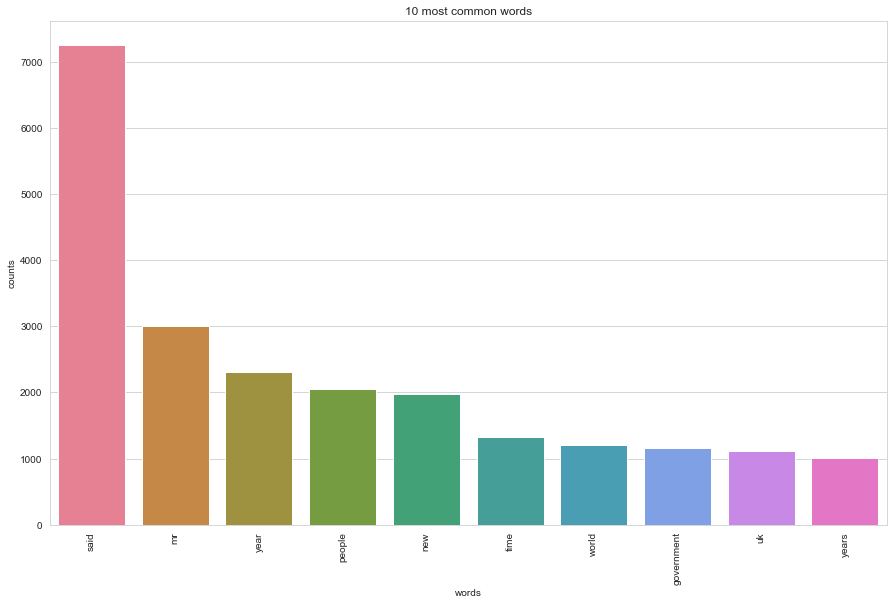

In [13]:
"""
I am using the business list to make sure the model is running and to do some tweaks on the model with stop words...
"""


# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df.articles)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 20
# Create and fit the LDA model
lda = LDA(n_components=number_topics, 
          n_jobs=-1, max_iter=10)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
said people technology mobile new net mr computer use digital software users games online phone used broadband make service like

Topic #1:
said year game win time world england team play cup wales players just match final second club good set old

Topic #2:
said mr government labour people election party blair minister new told public plans howard uk say prime bbc tax law

Topic #3:
mr said brown new years world told year ebbers book worldcom turkey africa lee fraud sullivan eu man life blair

Topic #4:
said tv game music games robinson time people england ireland industry like peer video half new try file programmes play

Topic #5:
said year economy growth economic prices rate rise figures uk spending mr rates eu dollar high 2004 new years 2005

Topic #6:
music year best said band new number album uk record song years won awards chart award radio tv time rock

Topic #7:
film best said director year yukos films actor awards actress oscar award festival

## Using Gensim package for NLP and Topic Modeling to get rid of stop words that have no meaning in our analysis and to see what difference there is with LatentDirichletAllocation Topic Model with count vectorizer

In [15]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

articles = df.articles.values

for row in articles:
    x = []
    y = tokenize(row)
    x.append(y)
    

C:\Users\aguil\.conda\envs\Project\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


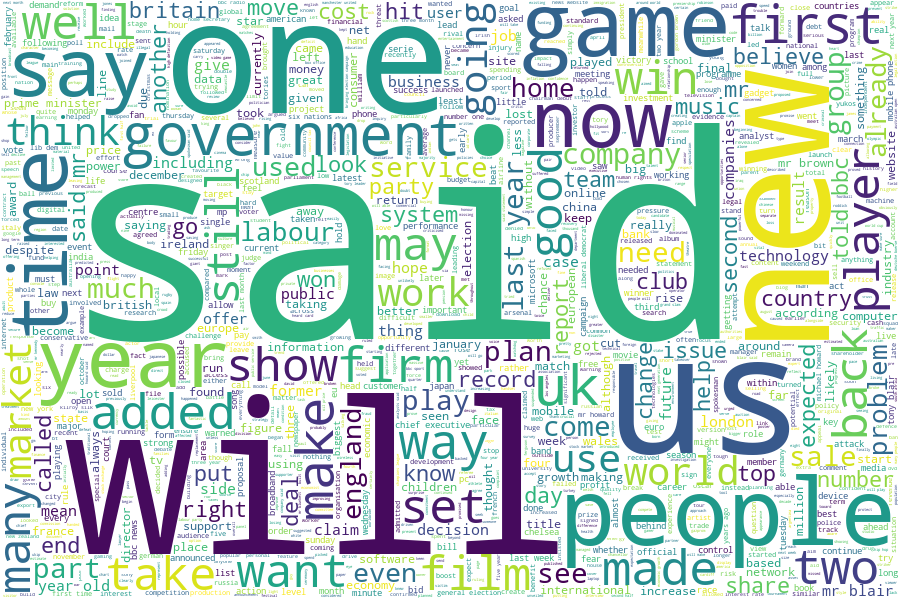

In [27]:
# Load the regular expression library
import re
# Remove punctuation
df['articles_text_processed'] = df['articles'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['articles_text_processed'] = df['articles_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['articles_text_processed'].head()


# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['articles_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=900, height=600)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
import gensim
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

id2word = corpora.Dictionary(x)

In [29]:
corpus = [id2word.doc2bow(text) for text in x]

In [30]:
lda = LdaMulticore(id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=8,
                   corpus=corpus
                  )

In [31]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [32]:
topics = [' '.join(t[0:5]) for t in words]

In [33]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
game time playing online games

------ Topic 1 ------
gaming game games playing time

------ Topic 2 ------
online gaming playing game hours

------ Topic 3 ------
time gaming game online games

------ Topic 4 ------
games playing online time gaming

------ Topic 5 ------
gaming playing game play online

------ Topic 6 ------
gaming online games game playing

------ Topic 7 ------
game playing hours online time

------ Topic 8 ------
gaming games online playing time

------ Topic 9 ------
games gaming time hours world

------ Topic 10 ------
time online games game hours

------ Topic 11 ------
gaming games online game playing

------ Topic 12 ------
game gaming online time playing

------ Topic 13 ------
game time gaming hours online

------ Topic 14 ------
online time playing gaming game



# I feel that the first model was better so I will use that model for articles that mention G20 countries

## Common Themes in Each Article Section

# Business

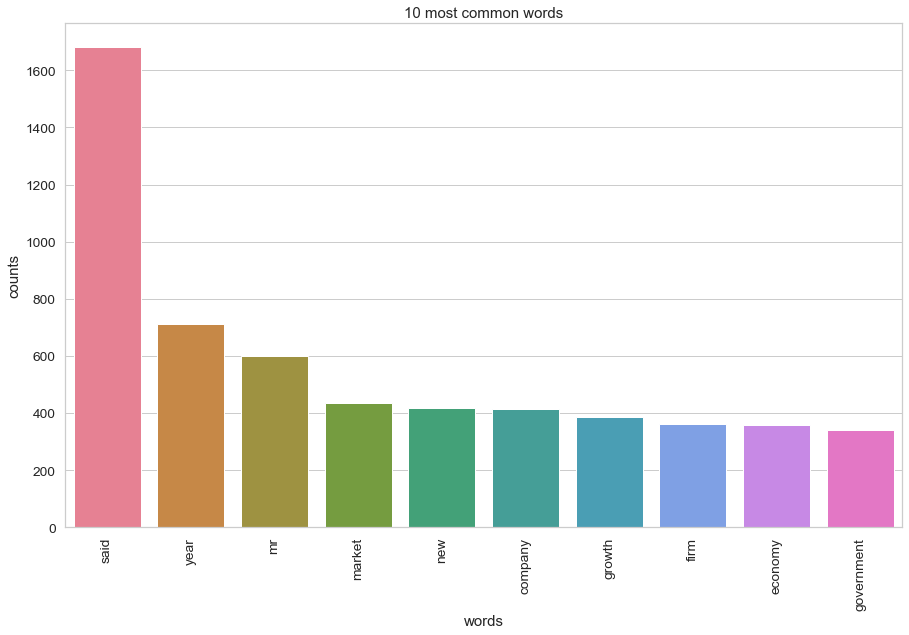

Topics found via LDA:

Topic #0:
said government tobacco new steel china japan mr land country 000 court companies years year business projects dam smoking mini

Topic #1:
said yukos mr russian oil company russia firm state gazprom court new firms government tax rosneft eu yugansk market world

Topic #2:
china said new bank firm mr years air market lg boeing card planes company trade creditors year world government state

Topic #3:
said government people company india bank economic sri lanka shares new hit country parmalat stock million debt world mr indonesia

Topic #4:
said fiat gm year deal bank shares company mr market group 000 firm new financial state firms club japan car

Topic #5:
mr said ebbers new budget president 000 year fraud company worldcom chief bush firm financial sullivan jobs government market years

Topic #6:
oil said lse deutsche boerse london prices bid dollar crude exchange euronext offer market energy stock meeting year india talks

Topic #7:
said year profits s

In [34]:
#transform new sparse matrix
count_data = count_vectorizer.fit_transform(business)
#fit new model
lda = LDA(n_components=number_topics, 
          n_jobs=-1, max_iter=10)
lda.fit(count_data)


# Print the topics found by the LDA model

plot_10_most_common_words(count_data, count_vectorizer)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# Entertainment

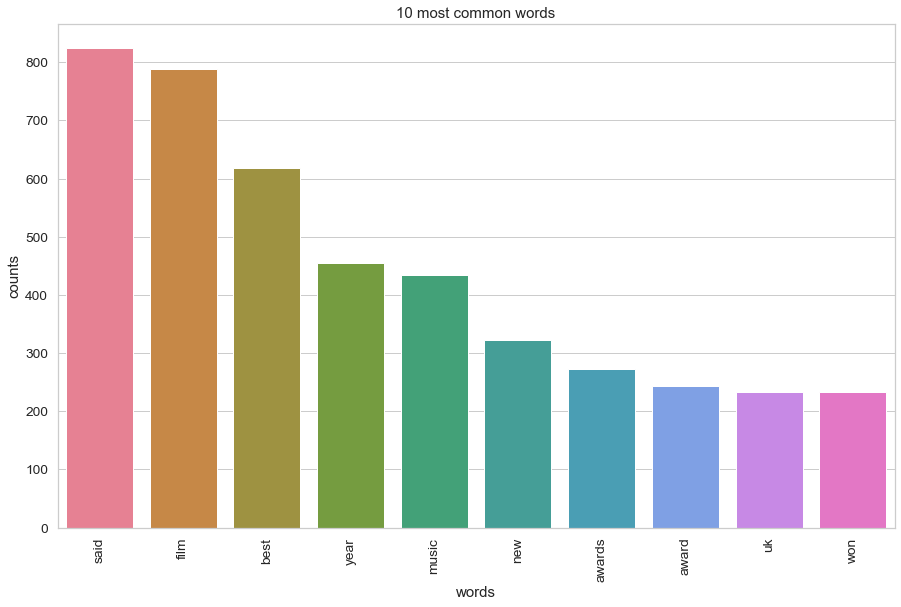

Topics found via LDA:

Topic #0:
said bbc tv year new award best comedy film people awards series like shows time million love television office children

Topic #1:
film best awards director actor won award actress year oscar festival aviator said british films oscars song win nominated foxx

Topic #2:
film said year number box office new week lee took films years comedy weekend chart place release starring second davis

Topic #3:
music said ballet new festival dance mr 000 year radio british bollywood peel people world uk films band told 10

Topic #4:
film said best mr bbc star edwards role musical time actress films new life producers number oscar year director festival

Topic #5:
band said best album year music awards new award uk time rock song won film years people british number star

Topic #6:
music said urban people stone like album industry black joss don mr just really government cent year 50 artists record

Topic #7:
chart sales said uk film year music star download singles 

In [35]:
#transform new sparse matrix
count_data = count_vectorizer.fit_transform(entertainment)
#fit new model
lda.fit(count_data)


# Print the topics found by the LDA model

plot_10_most_common_words(count_data, count_vectorizer)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# Politics

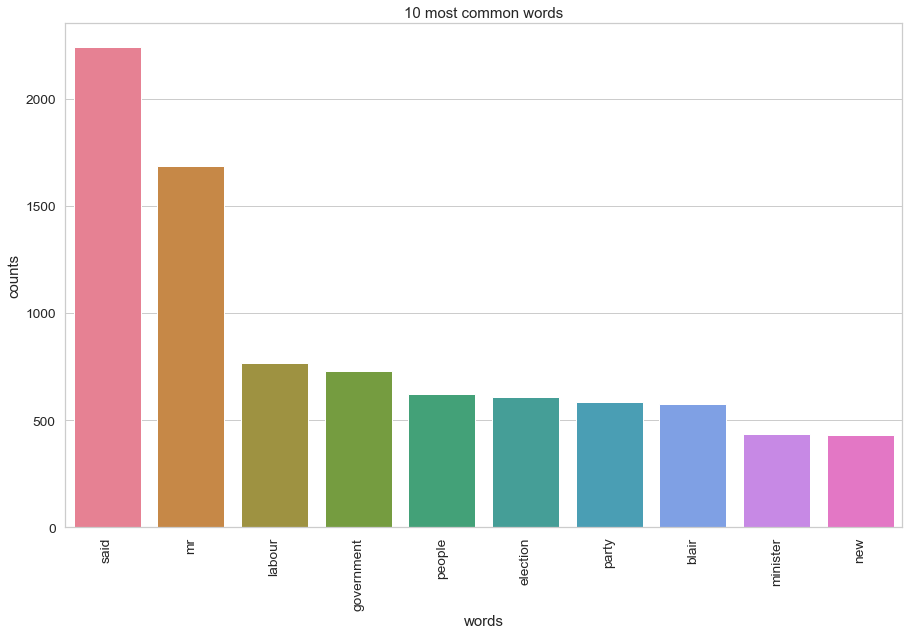

Topics found via LDA:

Topic #0:
said mr lord government blunkett secretary new blair answer minister uk advice goldsmith time told general iraq security work africa

Topic #1:
said government mr lord rights lords new law human house people terror secretary trial home court suspects police told british

Topic #2:
said mr china straw rights embargo ban human arms eu lifted parliament public scotland scottish foreign law want mcconnell evidence

Topic #3:
mr said tax labour howard election party people tory government tories blair lib plans kennedy taxes increase michael say public

Topic #4:
said government public workers pension ms union new service 000 women unions local strike people mr sector choice work minister

Topic #5:
said people mr police home government law new spokesman party plans office cards id mps hunting committee bbc children public

Topic #6:
said brown mr budget chancellor government election labour duty economy economic stability spending tax report treasury sir st

In [36]:
#transform new sparse matrix
count_data = count_vectorizer.fit_transform(politics)
#fit new model
lda.fit(count_data)


# Print the topics found by the LDA model

plot_10_most_common_words(count_data, count_vectorizer)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# Sports

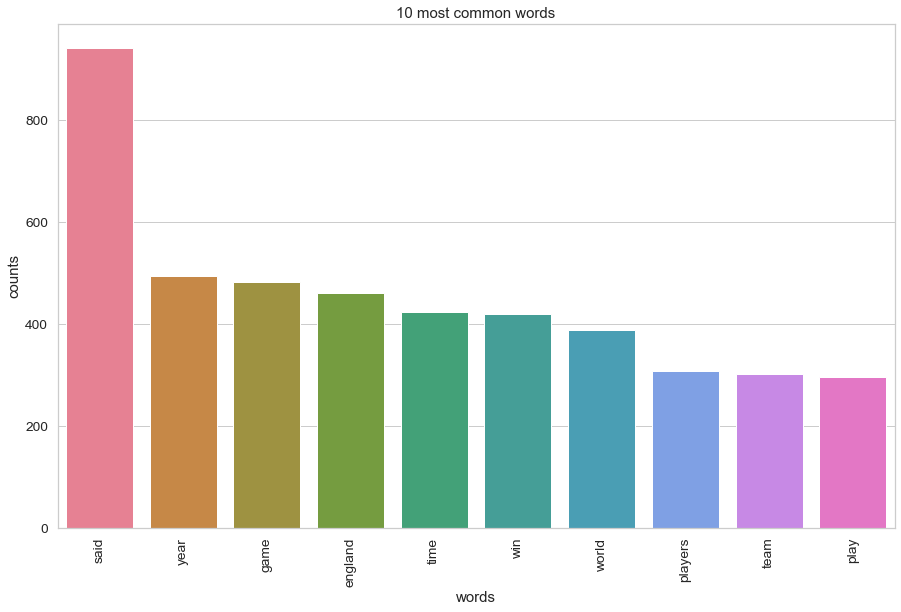

Topics found via LDA:

Topic #0:
said win open play year game match set final cup world second good australian time seed players beat number really

Topic #1:
half minutes goal ireland ball lead game second roddick penalty break try set shot time kick home nadal italy left

Topic #2:
world year race olympic european champion indoor time best said won record championships holmes win title season britain mark british

Topic #3:
said southampton face home manager united wolves cup burnley tie replay west round brentford world forest williams club new collins

Topic #4:
said game united good referee ferguson arsenal think time got added half don try win play players match chance just

Topic #5:
said rugby england squad cup club sale stade wales bath injury year leeds france week edinburgh murray leicester team great

Topic #6:
said spain aragones football spanish team real coach arsenal racist madrid fine play players federation rochus year 000 racism england

Topic #7:
england wales natio

In [37]:
#transform new sparse matrix
count_data = count_vectorizer.fit_transform(sport)
#fit new model
lda.fit(count_data)


# Print the topics found by the LDA model

plot_10_most_common_words(count_data, count_vectorizer)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# Tech

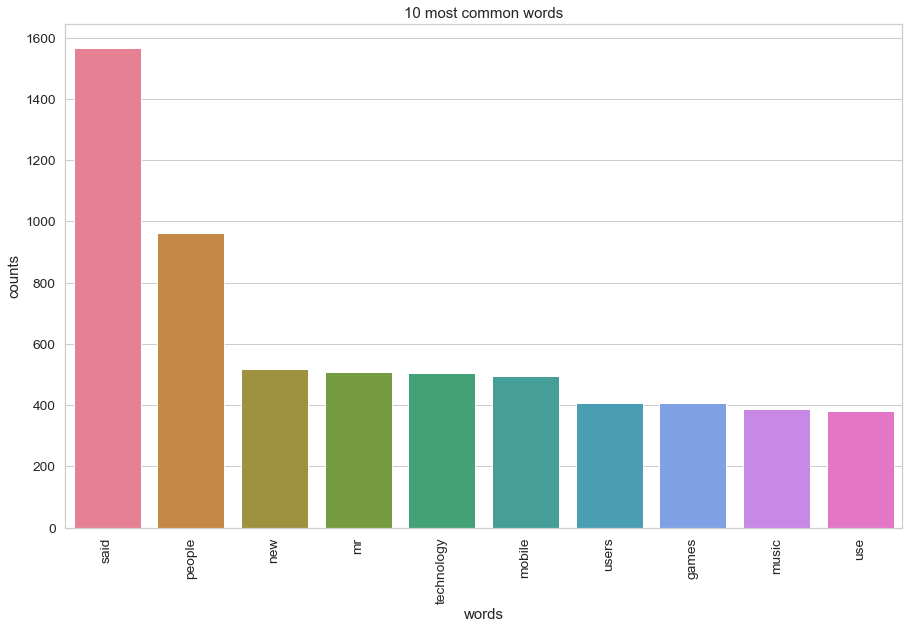

Topics found via LDA:

Topic #0:
spam said security people microsoft software mail new media bbc digital scheme pcs spammers mails hdtv windows seafarers number world

Topic #1:
said music mobile tv people phones digital mobiles million phone year according services report like video market players service analysts

Topic #2:
said people technology new computer use digital data uk used sony year site phone devices consumer net help mr world

Topic #3:
said people search mr games technology online users new high google software file like world web dvd use make music

Topic #4:
said people mobile technology phone new broadband digital uk mr net make use bt service year services just phones used

Topic #5:
said china mr games game ink sun use yahoo chinese news grid new learning media market computing irish google elections

Topic #6:
game games gaming sony nintendo console xbox gamers play titles said time ds like new consoles year psp handheld playstation

Topic #7:
said software sites 

In [38]:
#transform new sparse matrix
count_data = count_vectorizer.fit_transform(tech)
#fit new model
lda.fit(count_data)


# Print the topics found by the LDA model

plot_10_most_common_words(count_data, count_vectorizer)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [39]:
all_countries.head()

,articles,Australia,Canada,Saudi_Arabia,United_States,India,Russia,South_Africa,Turkey,Argentina,Brazil,Mexico,France,Germany,Italy,United_Kingdom,China,Indonesia,Japan,South_Korea
1,Dollar gains on Greenspan speech\n\nThe dollar...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Yukos unit buyer faces loan claim\n\nThe owner...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,High fuel prices hit BA's profits\n\nBritish A...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Pernod takeover talk lifts Domecq\n\nShares in...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,Japan narrowly escapes recession\n\nJapan's ec...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [44]:
g20_articles = all_countries['articles'].to_list()

len(g20_articles)

788

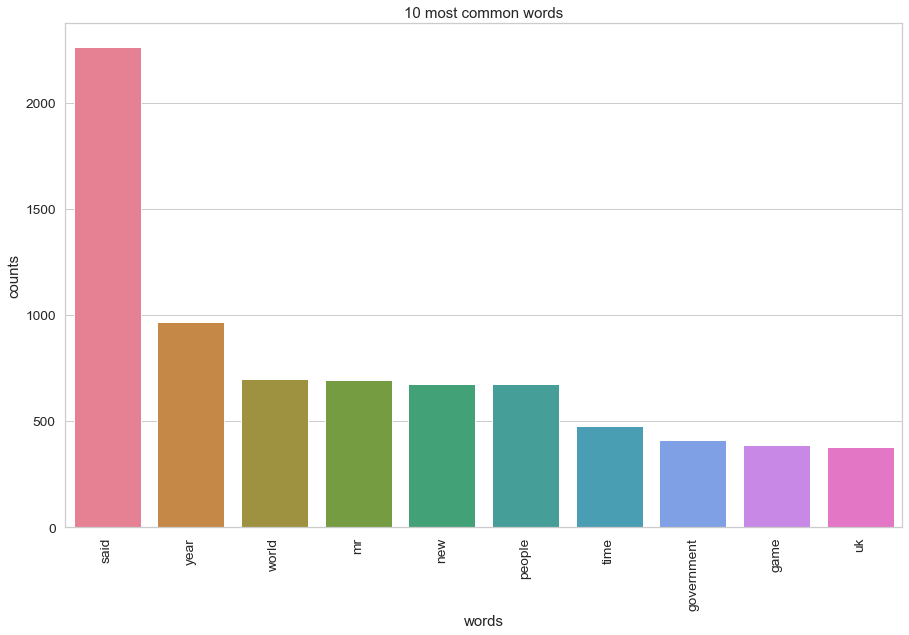

Topics found via LDA:

Topic #0:
said people mr says net government president just phone reliance cuba like brazil make group 2002 edu anil new company

Topic #1:
film said year new japan world films best years star festival movie director firms uk office bbc foreign japanese award

Topic #2:
mr said eu government blair people turkey howard labour country party like election forsyth years tories just games british new

Topic #3:
said year mr government growth economy oil market company economic yukos people new firm india companies 2004 world business state

Topic #4:
england wales france ireland half robinson said game nations coach win squad injury williams jones just world hodgson captain team

Topic #5:
said people mr mobile uk tv digital technology music year new phone high broadband phones sales europe like services video

Topic #6:
china mobile said bank new virus 3g technology firm card site users phone networks lg net data mail south using

Topic #7:
game said world time new p

In [45]:
#transform new sparse matrix
count_data = count_vectorizer.fit_transform(g20_articles)
#fit new model
lda.fit(count_data)


# Print the topics found by the LDA model

plot_10_most_common_words(count_data, count_vectorizer)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)